In [1]:
# Importing necessary libraries for data processing, visualization, or modeling
import numpy as np
# Importing necessary libraries for data processing, visualization, or modeling
import pandas as pd

Thr dataset link-https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download

In [2]:
# Reading the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv("/content/Tweets.csv" , delimiter = ",")

In [3]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
X = data.text

In [5]:
X

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


In [6]:
X = np.array(X)

In [7]:
X

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [8]:
Y = np.array(data.airline_sentiment)

In [9]:
Y.shape , X.shape
# Importing necessary libraries for data processing, visualization, or modeling
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets to evaluate model performance
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

In [10]:
# Importing necessary libraries for data processing, visualization, or modeling
from nltk.stem import WordNetLemmatizer
# Importing necessary libraries for data processing, visualization, or modeling
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()

In [11]:
# Importing necessary libraries for data processing, visualization, or modeling
from nltk.corpus import wordnet
def get_simple_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [12]:
# Importing necessary libraries for data processing, visualization, or modeling
import nltk
nltk.download('stopwords')
# Importing necessary libraries for data processing, visualization, or modeling
from nltk.corpus import stopwords
# Importing necessary libraries for data processing, visualization, or modeling
import string
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops, string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  "he'd",
  "he'll",
  "he's",
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  "i'd",
  "i'll",
  "i'm",
  "i've",
  'if',
  'in',
  'into',
  'is',
  'isn',

In [13]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return " ".join(output_words)

In [14]:
# Importing necessary libraries for data processing, visualization, or modeling
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
# Importing necessary libraries for data processing, visualization, or modeling
from nltk.tokenize import word_tokenize

X_train = [clean_review(word_tokenize(i)) for i in X_train]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
X_train

['jetblue yes thankfully catering get load frustrate suppose 10-10:30',
 "united yes amp 're unsure would come.this never happen airline first time united disappointed",
 "united wife two new destination 'm stuck dc monday bag",
 "united still bag arrive 10am amp website say 're still airport .. 2 1/2 hour late flightr nothappy",
 "americanair dfwairport 's dfw omg yeah cold everywhere",
 'southwestair 2/22-mdw 2 san flt 1687 attendant melissa awesome fast smile great weather cancelled flight day b4 welcome',
 "usairways 1729 connect charlotte houston mechanical issue determine q 'd take checked bag",
 'usairways website isnt work cant talk any1 phone check flight status dfw roads awful cant get',
 "united many delay today ... 's hoping 12:26pm flight board soon united premier1k",
 "southwestair many left 'm 15 min wway",
 'united thank yes hop speak someone directly appreciate link nonetheless',
 'jetblue kylejudah spoke baggage claim center give travel credit responsible cost',
 "uni

In [16]:
X_test = [ clean_review(word_tokenize(i)) for i in X_test]

In [17]:
# Importing necessary libraries for data processing, visualization, or modeling
from sklearn.feature_extraction.text import CountVectorizer
# Converting text data into numerical feature vectors for machine learning models
count_vec = CountVectorizer(max_features = 10025 , ngram_range=(1,3))
# Fitting the vectorizer on the training data and transforming text into numerical form
X_train_features = count_vec.fit_transform(X_train)

In [18]:
X_test_features = count_vec.transform(X_test)

In [19]:
x_test = X_test_features.todense()
x_train = X_train_features.todense()

In [20]:
# Importing necessary libraries for data processing, visualization, or modeling
from sklearn.naive_bayes import MultinomialNB
# Importing necessary libraries for data processing, visualization, or modeling
from sklearn.ensemble import RandomForestClassifier

clf = MultinomialNB()
clf.fit(X_train_features , Y_train)
# Using the trained model to make predictions on test data
Y_pred = clf.predict(X_test_features)

In [21]:
np.savetxt("pred.csv" , Y_pred , fmt="%s")

Model Accuracy: 0.7801

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      1870
     neutral       0.63      0.49      0.55       614
    positive       0.72      0.66      0.69       444

    accuracy                           0.78      2928
   macro avg       0.73      0.69      0.70      2928
weighted avg       0.77      0.78      0.77      2928



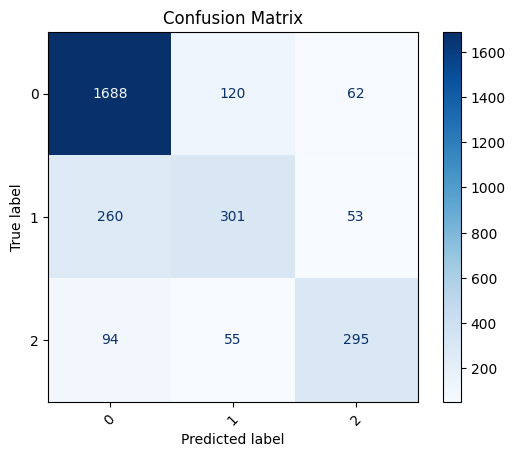

In [28]:
# ✅ Accuracy Evaluation
# Importing necessary libraries for data processing, visualization, or modeling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming your test labels are in y_test and model predictions in y_pred
# Calculating the overall accuracy of the model on test data
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Optional: Print detailed performance metrics
print("\nClassification Report:")
# Displaying detailed classification metrics: precision, recall, and F1-score
print(classification_report(Y_test, Y_pred))

# Optional: Show confusion matrix
# Showing a confusion matrix to visualize correct and incorrect classifications
conf_matrix=confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()